### Data Processing By Models
18/6/2022 | P.A.C. Eyong

In [1]:
import sys
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import __version__ as p9__version__
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import __version__ as sk__version__

print("python", sys.version,
      "\nnumpy", np.__version__,
      "\npandas", pd.__version__,
      "\nplotnine", p9__version__,
      "\nstatsmodels", sm.__version__,
      "\nsklearn", sk__version__)

python 3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)] 
numpy 1.22.4 
pandas 1.4.2 
plotnine 0.8.0 
statsmodels 0.13.2 
sklearn 1.1.1


In [2]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
airbb = pd.read_csv('test_data/airbnb_listings.csv')
airbb

,id,name,host_id,host_name,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7491644,Beautiful apartment Prenzlauer Berg,12761545,Radu,Pankow,Prenzlauer Berg Süd,52.529886,13.428187,Private room,49,2,12,2018-03-12,0.30
4996,7492748,"Sunny Spacious Room, Central, Quiet",28497746,Celest,Tempelhof - Schöneberg,Schöneberg-Nord,52.492497,13.369300,Private room,30,2,90,2018-10-31,2.27
4997,7495407,Heval's 5-Room Grand Appartment,39257044,Heval,Tempelhof - Schöneberg,Tempelhof,52.473774,13.386162,Entire home/apt,240,4,36,2018-08-19,0.93
4998,7495977,Sunny 3 room apartment with balcony,39259413,Oliver,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.495174,13.412833,Entire home/apt,70,3,1,2015-08-10,0.03


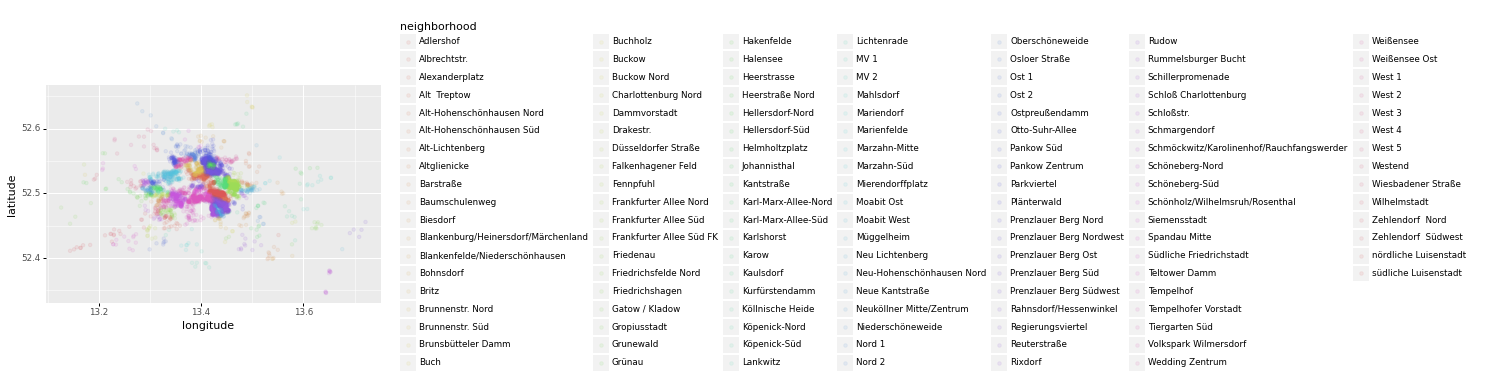

<ggplot: (170033259932)>

In [4]:
%config InlineBackend.figure_format = 'png'

ggplot(data = airbb, mapping = aes('longitude', 'latitude', color = 'neighborhood')) +\
    geom_point(alpha = .1)

In [5]:
# Object > Categorical
def to_categorical(pd_df):
    for col in pd_df.select_dtypes('object').columns:
        pd_df[col] = pd.Categorical(pd_df[col])

                 precision    recall  f1-score   support

Entire home/apt       0.83      0.92      0.87      2835
   Private room       0.87      0.75      0.81      2117
    Shared room       1.00      0.67      0.80        48

       accuracy                           0.85      5000
      macro avg       0.90      0.78      0.83      5000
   weighted avg       0.85      0.85      0.84      5000



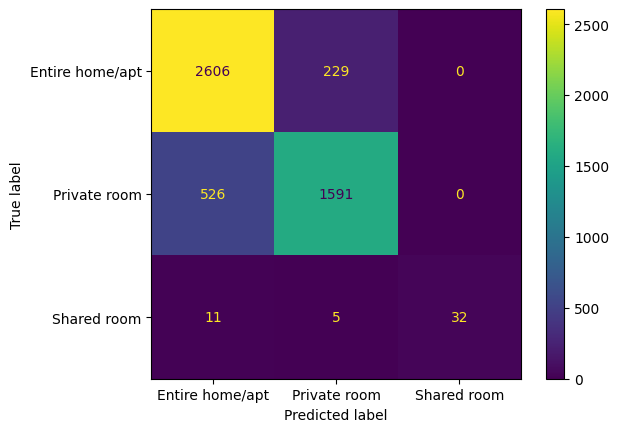

In [17]:
to_categorical(airbb)

y = airbb['room_type']
X = airbb[['longitude', 'latitude']]

c = tree.DecisionTreeClassifier(max_depth = 15)
m = c.fit(X,y)

p = m.predict(X)

print(classification_report(y,p))
ConfusionMatrixDisplay.from_predictions(y, p, labels = y.cat.categories)

In [18]:
print('Tree depth: ', m.get_depth())
print('Number of leaves: ', m.get_n_leaves())

Tree depth:  15
Number of leaves:  928


In [19]:
print(tree.export_text(m, feature_names = X.columns.array))

|--- longitude <= 13.43
|   |--- longitude <= 13.39
|   |   |--- longitude <= 13.36
|   |   |   |--- latitude <= 52.52
|   |   |   |   |--- latitude <= 52.49
|   |   |   |   |   |--- longitude <= 13.35
|   |   |   |   |   |   |--- longitude <= 13.34
|   |   |   |   |   |   |   |--- latitude <= 52.42
|   |   |   |   |   |   |   |   |--- latitude <= 52.41
|   |   |   |   |   |   |   |   |   |--- longitude <= 13.21
|   |   |   |   |   |   |   |   |   |   |--- class: Entire home/apt
|   |   |   |   |   |   |   |   |   |--- longitude >  13.21
|   |   |   |   |   |   |   |   |   |   |--- class: Private room
|   |   |   |   |   |   |   |   |--- latitude >  52.41
|   |   |   |   |   |   |   |   |   |--- class: Entire home/apt
|   |   |   |   |   |   |   |--- latitude >  52.42
|   |   |   |   |   |   |   |   |--- longitude <= 13.17
|   |   |   |   |   |   |   |   |   |--- class: Private room
|   |   |   |   |   |   |   |   |--- longitude >  13.17
|   |   |   |   |   |   |   |   |   |--- longitu

##### Pruned Tree

In [34]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

c_rf = RandomForestClassifier(n_estimators = 10, max_features = 1)
m_rf = c_rf.fit(X, y)

                 precision    recall  f1-score   support

Entire home/apt       0.96      0.99      0.97      2835
   Private room       0.99      0.94      0.96      2117
    Shared room       1.00      0.96      0.98        48

       accuracy                           0.97      5000
      macro avg       0.98      0.96      0.97      5000
   weighted avg       0.97      0.97      0.97      5000



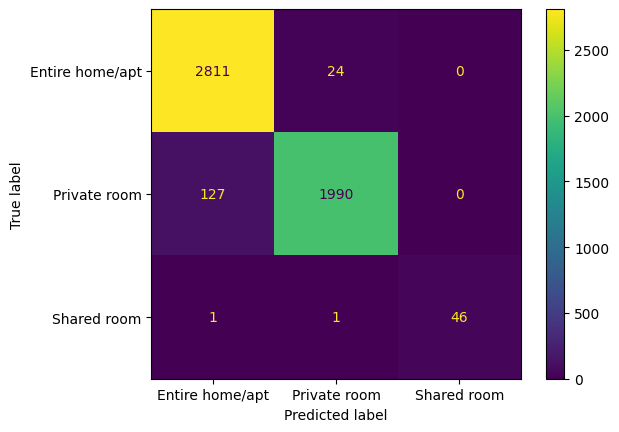

In [35]:
p_rf = m_rf.predict(X)

print(classification_report(y,p_rf))
ConfusionMatrixDisplay.from_predictions(y, p_rf, labels = y.cat.categories)

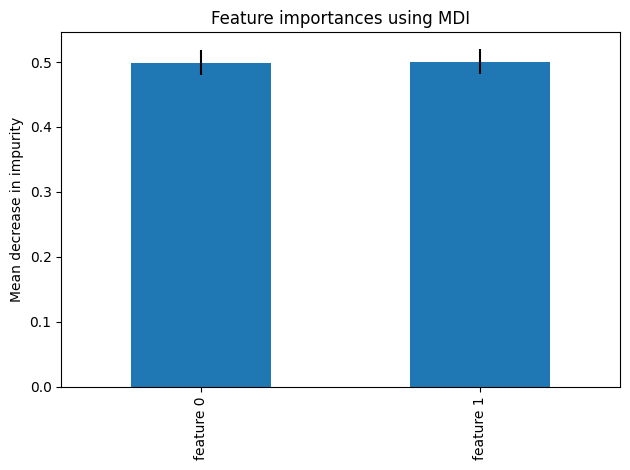

In [42]:
importances = c_rf.feature_importances_
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in c_rf.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [44]:
estimator = m_rf.estimators_[1]
print(tree.export_text(estimator, feature_names = X.columns.array))

|--- latitude <= 52.52
|   |--- latitude <= 52.51
|   |   |--- longitude <= 13.35
|   |   |   |--- latitude <= 52.49
|   |   |   |   |--- latitude <= 52.42
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- latitude >  52.42
|   |   |   |   |   |--- latitude <= 52.42
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- latitude >  52.42
|   |   |   |   |   |   |--- latitude <= 52.45
|   |   |   |   |   |   |   |--- latitude <= 52.43
|   |   |   |   |   |   |   |   |--- latitude <= 52.42
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- latitude >  52.42
|   |   |   |   |   |   |   |   |   |--- latitude <= 52.43
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- latitude >  52.43
|   |   |   |   |   |   |   |   |   |   |--- latitude <= 52.43
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- latitude >  52.43
|   |   |   |   |   |  